In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import re
import regex
from datetime import datetime

%matplotlib inline

     |████████████████████████████████| 112kB 4.0MB/s eta 0:00:01
     |████████████████████████████████| 1.1MB 13.0MB/s eta 0:00:01
     |████████████████████████████████| 81kB 24.6MB/s eta 0:00:01
     |████████████████████████████████| 6.0MB 35.8MB/s eta 0:00:01
     |████████████████████████████████| 471kB 37.9MB/s eta 0:00:01
     |████████████████████████████████| 112kB 47.7MB/s eta 0:00:01
     |████████████████████████████████| 51kB 26.0MB/s eta 0:00:01
     |████████████████████████████████| 266kB 59.3MB/s eta 0:00:01
     |████████████████████████████████| 61kB 30.0MB/s eta 0:00:01
  Created wheel for optuna: filename=optuna-0.17.1-cp36-none-any.whl size=144909 sha256=133858fb67ab668d5d5094306fd71eb6f6b8225e09f3f69394d41913146e3f8b
  Stored in directory: /home/ec2-user/.cache/pip/wheels/11/88/8a/f490ae6d6bea4398e52b38d122f46fa9287d14c0a3cf6ba728
  Created wheel for alembic: filename=alembic-1.2.1-py2.py3-none-any.whl size=144229 sha256=6966dfee26fe88d10deb88487e745dd01ec549d1

In [187]:
import optuna

In [4]:
daily_df = pd.read_csv('./data/daily_result.csv')

In [183]:
store_info_df = pd.read_csv('./data/store_info.csv')

In [134]:
daily_df['weekday'].unique()

array(['4_水', '3_火', '1_日', '5_木', '6_金', '2_月', '7_土'], dtype=object)

In [181]:
daily_df['weekday_code'] = daily_df['weekday'].str[0].astype(int)

In [149]:
daily_df.min()

date                                                        2019-07-01
weekday                                                            1_日
holiday_flg                                                          0
merchant_id          010757a101e206b3d695516541fa7da90e9b1e26e86496...
store_id             0000914aba4b71d1ab089515494eaf7548d266afb20edb...
store_merchant_id    0000914aba4b71d1ab089515494eaf7548d266afb20edb...
transaction                                                          0
GMV                                                                  0
active_user                                                          0
wallet_rate                                                          0
weekday_code                                                         1
dtype: object

In [61]:
# store_info_df.drop(['store_merchant_id', 'merchant_id'], axis=1, inplace=True)
store_info_df.rename(columns={'store_marchant_id': 'store_merchant_id'}, inplace=True)

In [9]:
train_df = pd.merge(
    daily_df.drop(['merchant_id', 'store_id'], axis=1),
    store_info_df, 
    on='store_merchant_id', 
    how='left'
)

In [10]:
train_df.columns

Index(['date', 'weekday', 'holiday_flg', 'store_merchant_id', 'transaction',
       'GMV', 'active_user', 'wallet_rate', 'merchant_id', 'store_id',
       'category_name', 'sub_category_name', 'prefecture', 'city',
       'village_section', 'scan'],
      dtype='object')

In [25]:
store_info_df.head()

,store_merchant_id,merchant_id,store_id,category_name,sub_category_name,prefecture,city,village_section,scan
0,0245d1333a6ad2399835cd66738b81625b50dc39205ec9...,ba34768a63c173579dae780ae69a8173c9ec8cb2175f11...,0245d1333a6ad2399835cd66738b81625b50dc39205ec9...,飲食,居酒屋・パブ・バー,東京都,NaN,NaN,M_Scan
1,5195d84a339b2cc1b5f28c51215e830a5f740808c319fd...,ba34768a63c173579dae780ae69a8173c9ec8cb2175f11...,5195d84a339b2cc1b5f28c51215e830a5f740808c319fd...,飲食,居酒屋・パブ・バー,埼玉県,NaN,NaN,M_Scan
2,b3a027b0768d6078500a11be2ae642942187c10131e694...,ba34768a63c173579dae780ae69a8173c9ec8cb2175f11...,b3a027b0768d6078500a11be2ae642942187c10131e694...,飲食,居酒屋・パブ・バー,東京都,NaN,NaN,M_Scan
3,14eef22551900b0728e35558de5bc2d6f300531e90f223...,ba34768a63c173579dae780ae69a8173c9ec8cb2175f11...,14eef22551900b0728e35558de5bc2d6f300531e90f223...,飲食,居酒屋・パブ・バー,埼玉県,NaN,NaN,M_Scan
4,6d3da9edd4863a0aa6a99df30693fe041c64181949bdec...,ba34768a63c173579dae780ae69a8173c9ec8cb2175f11...,6d3da9edd4863a0aa6a99df30693fe041c64181949bdec...,飲食,居酒屋・パブ・バー,北海道,NaN,NaN,M_Scan


In [56]:
daily_df.columns

Index(['date', 'weekday', 'holiday_flg', 'merchant_id', 'store_id',
       'store_merchant_id', 'transaction', 'GMV', 'active_user', 'wallet_rate',
       'weekday_code'],
      dtype='object')

In [71]:
columns= [transaction","GMV" ,"active_user","wallet_rate"]

fig = plt.figure(figsize = (10,10))
def get_hists(df,colunns):
    fig = plt.figure(figsize = (10,10))
    for i in range(4):
        
        
        print(f"Skewness: {df.skew()}"  )
        print(f"Kurtosis: {df.kurt()}" )
        plt.subplot(2,2,i+1)
        plt.hist(df.values, bins = 100)
        plt.title(f"{columns[i]}")

SyntaxError: invalid character in identifier (<ipython-input-71-f510f4676494>, line 1)

In [72]:
train_df.groupby().describe()

,holiday_flg,transaction,GMV,active_user,wallet_rate,weekday_code
count,4.718714e+06,4.718714e+06,4.718714e+06,4.718714e+06,4.718714e+06,4718714.0
mean,3.296703e-01,9.457283e+00,9.529949e+03,8.771479e+00,7.241183e-01,4.0
std,4.700934e-01,1.975290e+01,5.397738e+04,1.794867e+01,3.516094e-01,2.0
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0
25%,0.000000e+00,2.000000e+00,1.227000e+03,2.000000e+00,6.666667e-01,2.0
50%,0.000000e+00,6.000000e+00,4.170000e+03,5.000000e+00,8.571429e-01,4.0
75%,1.000000e+00,1.200000e+01,8.796000e+03,1.100000e+01,1.000000e+00,6.0
max,1.000000e+00,2.094000e+03,5.570313e+06,1.990000e+03,4.000000e+00,7.0


In [84]:
columns= ["transaction","GMV" ,"active_user","wallet_rate"]

fig = plt.figure(figsize = (10,10))
def get_hists(df,colunns):
    fig = plt.figure(figsize = (10,10))
    for i in range(4):
        
        
        print(f"Skewness: {df[columns[i]].skew()}"  )
        print(f"Kurtosis: {df[columns[i]].kurt()}" )
        plt.subplot(2,2,i+1)
        plt.hist(np.log1p(df[columns[i]].values), bins = 100)
        plt.title(f"{columns[i]}")

<Figure size 720x720 with 0 Axes>

Skewness: 26.315496367422178
Kurtosis: 1646.8833963550958
Skewness: 29.63220246568545
Kurtosis: 1302.0518213330106
Skewness: 27.06023638625351
Kurtosis: 1786.0762183327458
Skewness: -1.290312464112716
Kurtosis: 0.16024591444043157


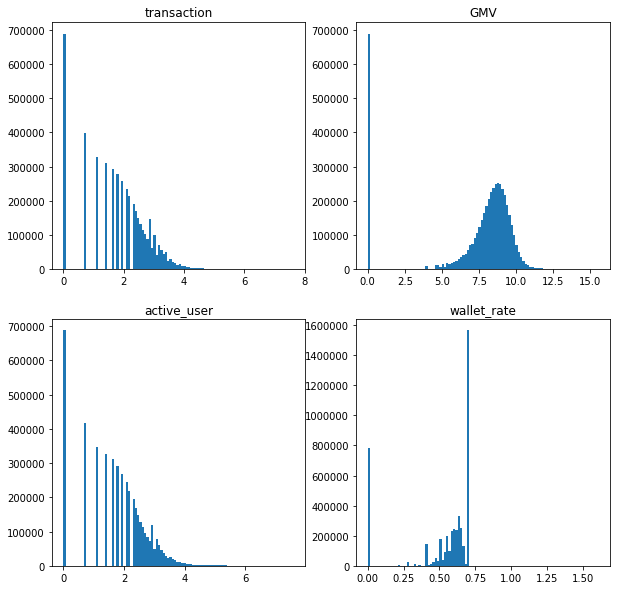

In [85]:
get_hists(train_df, columns)

In [101]:
daily_df.groupby(['store_merchant_id']).count()

,date,weekday,holiday_flg,merchant_id,store_id,transaction,GMV,active_user,wallet_rate,weekday_code
store_merchant_id,,,,,,,,,,
0000914aba4b71d1ab089515494eaf7548d266afb20edb18f220d6bde9fea777a972b1c72e5caa24f2ee06fbafab8cd05fcb66592eadec3539739bfb871c91ee_9972cc88e494b1a81168e8932da381e5ca01d2a14dc0a06f46950f1bb6b481e51f43d671f30f405d169ce246503685b873f1cffcff3e745578b024fa07ddaf21,91,91,91,91,91,91,91,91,91,91
0000f2c81eda0f4575de8dd14186913fb746a7f0693c2ed0e49213c57617a2c7bd134371091272a691d4b331ace848dae27d37d174a7049bf3fdf10cea6ceafa_016f7069d87c6718b2ea03b4692936208faa3a03682a877046b0ebbd4253c1ee9282db57958e98798509479ecd8fc7c62309c9bf288d9fdab5c6b423f8a62a72,91,91,91,91,91,91,91,91,91,91
00022d2e137ee4fccd3bf09d727cbd3f09404bea1dcba736b58f2ffdf8745832285b0e514d480b3ec12e9a725862cfd7e7ab93cf54022521dcb6bcd4bcf4acc7_1a9513f7b34d9a334e042c1718a48229b08a6c7b10b249461aa2da98a5e70dac3355ce7bf9c7eb1532cbe62b4833cfad0025985ee3d0b0f49ef0d24eb0402d48,91,91,91,91,91,91,91,91,91,91
000484f9b96841b4403d373e007624f47cfa9c29005e402152d6751aff72d2062da22a95652ad272b40f82691f26f972557bba3cb9b6893e9b4f85cdf2fc92ba_fce91f4f54d52b3e35ef058cb1523f4345564b398e699c39d2bbe8baf1ed87e73706180f9c0e5079bacd9c82c55c831ffa2a08263afefb33a33c18d359a9566b,91,91,91,91,91,91,91,91,91,91
0005ee0a8000b96b03f814a7208c5bc6616f753caf7e872c73648264772857e40fd43f8b8f2da8e47dfb74f477488be599f55986775cfe4bdecc6162dbfe82f4_4ac969a0bd9ca2eda70f52b04ddde5011787c8257bc32c7091a068f1c3f858beb91da2f256cd7a1c0fb47f562cdc9de019dbb3b31fda33c8a42320a932583049,91,91,91,91,91,91,91,91,91,91
...,...,...,...,...,...,...,...,...,...,...
fffb9ffa75037713c58496c1b85f3dbc9c7b1fa833df5f07ac752d80da17a9a4833869e314852da8aeab56665d87705590ef8dd2bd7cd0a341f3af5ab8636d6f_970a7b98984066e771019d5f326b05c0a554bd2d534c4814c967b59b78ab4f77b76338e108eddccda69466235c9279ef1cf0a5ef15eb14b30f99780b3c488934,91,91,91,91,91,91,91,91,91,91
fffe336ea9ff230854d4dd5ddaa4c32ac385a5270953c65bc99a7768cf0e28896f0d96ab9eba2dcc06cca86e9724f2b33de5ed01c175969502c7b1ee8c8b44b8_ce9281538e2ba27b30d298f003299813a3357dd9d6f02b00f9757303cb0e62454948601b2cdba50fb102c8edc40723ecf77b3222d857d354e533313c401a657e,91,91,91,91,91,91,91,91,91,91
fffe35d3c86c44752e77460fbf7c4f769f0d131d2da61251f440103a0f5b097fa3e56f7cdd1289fbd37d38eaae6ef3abe1b825917ca52d17eab7ea06926b8068_edb38c26e51920e63991272385289a58dd67f8aa4d97d37bd735494550d9c6d66e34488652a547fb666c54f782a503dfe2d581d34d39d17b05232dd8bba322c2,91,91,91,91,91,91,91,91,91,91


In [123]:
store_count_df = daily_df.where(daily_df['transaction'] != 0).groupby(['date'])['weekday'].count()

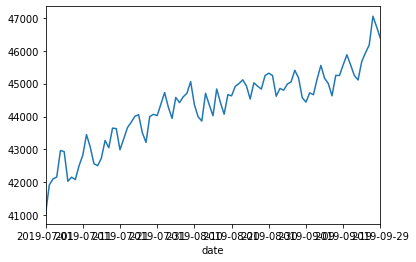

In [125]:
store_count_df.plot()

In [129]:
weeekday_sum = [daily_df.where(daily_df['weekday_code'] == i)['transaction'].sum() for i in range(1, 8)]

In [133]:
weeekday_sum / max(weeekday_sum)

array([0.88520775, 0.88606381, 0.93848399, 0.95468616, 0.97000867,
       1.        , 0.95332923])

In [139]:
daily_df.where(daily_df['date'] > datetime(2019,.groupby(['holiday_flg']).mean()

,transaction,GMV,active_user,wallet_rate,weekday_code
holiday_flg,,,,,
0,9.600651,8320.802004,8.907825,0.724598,4.131148
1,9.165767,11988.547173,8.494242,0.723143,3.733333


In [142]:
date_sum_df = daily_df.groupby(['date']).sum()

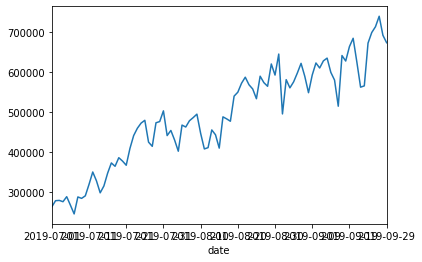

In [145]:
date_sum_df['transaction'].plot()

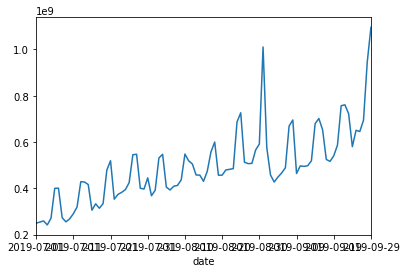

In [146]:
date_sum_df['GMV'].plot()

In [11]:
#del date_sum_df
def get_day(df):
    df["Year"]= df["date"].map(lambda x: x.year)
    df["Month"]= df["date"].map(lambda x: x.month)
    df["Day"]= df["date"].map(lambda x: x.day)
    return df
  
def kyuryobi(df):
    df["Payday"] = 0
    df["Payday"].loc[df["Day"].isin([10, 15, 25])]= 1
    return df

from sklearn.preprocessing import LabelEncoder

def target_enc(df, cols, target_col):
    for col in cols:
        for agg_type in ['mean','std']:
            new_col_name = col+target_col+agg_type
            temp_df = df[[col, 'TransactionAmt']]
            #temp_df['TransactionAmt'] = temp_df['TransactionAmt'].astype(int)
            temp_df = temp_df.groupby([col])[target_col].agg([agg_type]).reset_index().rename(
                                                    columns={agg_type: new_col_name})

            temp_df.index = list(temp_df[col])
            temp_df = temp_df[new_col_name].to_dict()   

            df[new_col_name] = df[col].map(temp_df)


def label_encode(df):
    for f in df.columns:
        if df[f].dtype.name =='object':
            
            lbl = LabelEncoder()
            lbl.fit(list(df[f].values.astype(str)))
            df[f] = lbl.transform(list(df[f].values))

    return df


In [5]:
get_day(train_df)
kyuryobi(train_df)

/home/ec2-user/miniconda3/envs/ml/lib/python3.6/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,date,weekday,holiday_flg,store_merchant_id,transaction,GMV,active_user,wallet_rate,merchant_id,store_id,...,village_section,scan,prefecture_r,weather,humidity,rain,Year,Month,Day,Payday
0,2019-08-14,3,0,7a33e9dd5c1f95c2d09da26af4bb880a7a53aa21ae9e57...,40,16549,32,0.925000,1a9513f7b34d9a334e042c1718a48229b08a6c7b10b249...,7a33e9dd5c1f95c2d09da26af4bb880a7a53aa21ae9e57...,...,新港,M_Scan,kanagawa,2.0,83.0,6.0,2019,8,14,0
1,2019-08-14,3,0,c0fc0ca8a6376b3464fe0fad541456955f6e3d7db7a07b...,375,843051,337,0.714667,ebec5c4de311e238c72c08ab33006b1aa69992c9798729...,c0fc0ca8a6376b3464fe0fad541456955f6e3d7db7a07b...,...,水道筋,U_Scan,hyogo,4.0,68.08333333333333,1.5,2019,8,14,0
2,2019-09-03,2,0,be733b9d34961451836fd54545d1e59d8e2e6ef43a0648...,31,23056,24,0.935484,4f2f9fa463dcd2d00ea91cb04b33354dae46f22fd0c9a6...,be733b9d34961451836fd54545d1e59d8e2e6ef43a0648...,...,本町,M_Scan,saitama,4.0,86.91666666666667,3.0,2019,9,3,0
3,2019-09-03,2,0,e6bb7711acb033840c9df5bc5620822b8be75093211963...,28,12272,27,0.892857,1a9513f7b34d9a334e042c1718a48229b08a6c7b10b249...,e6bb7711acb033840c9df5bc5620822b8be75093211963...,...,豊田,M_Scan,tokyo,4.0,87.625,1.5,2019,9,3,0
4,2019-09-03,2,0,1a0daa8f4c15110c952bf5246c0d7bf3fa1973e9bb61ae...,40,16992,37,0.850000,edb38c26e51920e63991272385289a58dd67f8aa4d97d3...,1a0daa8f4c15110c952bf5246c0d7bf3fa1973e9bb61ae...,...,博多駅中央街,M_Scan,fukuoka,4.0,77.66666666666667,0.5,2019,9,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4718709,2019-08-16,5,0,7ccb3334dd861ef8cc8cbeef4dbb0b6028be11d666532c...,25,13041,24,0.760000,1a9513f7b34d9a334e042c1718a48229b08a6c7b10b249...,7ccb3334dd861ef8cc8cbeef4dbb0b6028be11d666532c...,...,台場,M_Scan,tokyo,4.0,78.875,0.0,2019,8,16,0
4718710,2019-08-16,5,0,b7a9fb37c3fabd53a327f465bdee33e745cf22e58f359b...,25,19206,23,0.960000,edb38c26e51920e63991272385289a58dd67f8aa4d97d3...,b7a9fb37c3fabd53a327f465bdee33e745cf22e58f359b...,...,緑地公園,M_Scan,osaka,4.0,73.625,39.5,2019,8,16,0
4718711,2019-08-16,5,0,2e78aa8098ee864dc33bf8aeadc0bfcce323ebd86d4d61...,25,5095,25,1.000000,4f2f9fa463dcd2d00ea91cb04b33354dae46f22fd0c9a6...,2e78aa8098ee864dc33bf8aeadc0bfcce323ebd86d4d61...,...,梅田,M_Scan,osaka,4.0,73.625,39.5,2019,8,16,0
4718712,2019-08-16,5,0,c04b1357806051f36345780f99eca077bb78dcffcb8585...,25,21029,25,0.880000,c6d330cca2061d4267356c79aef8aa4e1f4421342bc238...,c04b1357806051f36345780f99eca077bb78dcffcb8585...,...,新宿,M_Scan,tokyo,4.0,78.875,0.0,2019,8,16,0


In [164]:
kyuryo_df = kyuryobi(daily_df)
kyuryo_df.loc[kyuryo_df['Payday'] == 1, :]

,date,weekday,holiday_flg,merchant_id,store_id,store_merchant_id,transaction,GMV,active_user,wallet_rate,weekday_code,Year,Month,Day,Payday
184,2019-08-15,5_木,0,f84ea76923484884f847cec042676cf6d6412ffc46e9bd...,ccfd6c3ce553e6100306abdb3bb47f0c1a0e316252409b...,ccfd6c3ce553e6100306abdb3bb47f0c1a0e316252409b...,31,18490,31,0.838710,5,2019,8,15,1
185,2019-08-15,5_木,0,4f2f9fa463dcd2d00ea91cb04b33354dae46f22fd0c9a6...,c3422ad959b4443ac3af15a87fc132247606ac0d49a501...,c3422ad959b4443ac3af15a87fc132247606ac0d49a501...,76,31025,66,0.907895,5,2019,8,15,1
186,2019-08-15,5_木,0,edb38c26e51920e63991272385289a58dd67f8aa4d97d3...,208c37668f9c2e76e2fe9effd469e7582f5efd401bf1a6...,208c37668f9c2e76e2fe9effd469e7582f5efd401bf1a6...,37,21127,32,0.864865,5,2019,8,15,1
187,2019-08-15,5_木,0,1a9513f7b34d9a334e042c1718a48229b08a6c7b10b249...,a0fd334cb1846c9b8a183d92b7fe0d5559887beb9a6479...,a0fd334cb1846c9b8a183d92b7fe0d5559887beb9a6479...,34,14904,32,0.823529,5,2019,8,15,1
188,2019-08-15,5_木,0,d4fc4fae60957f7fac010754adb3ba82976f3bfd7ccb1c...,59d0727d2e7d822e493746a904269b6ffb1a5b0bbf2d2c...,59d0727d2e7d822e493746a904269b6ffb1a5b0bbf2d2c...,138,234012,130,0.862319,5,2019,8,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4718651,2019-08-10,7_土,1,edb38c26e51920e63991272385289a58dd67f8aa4d97d3...,1571e635f73d25b4f4ac3690c1bc776761a1c80f3dc8b6...,1571e635f73d25b4f4ac3690c1bc776761a1c80f3dc8b6...,25,13986,23,0.840000,7,2019,8,10,1
4718652,2019-08-10,7_土,1,1a9513f7b34d9a334e042c1718a48229b08a6c7b10b249...,7841bd2f230f0e0e32fd9b62a5a5312d5a24c1b536c34e...,7841bd2f230f0e0e32fd9b62a5a5312d5a24c1b536c34e...,25,10238,20,0.600000,7,2019,8,10,1
4718653,2019-08-10,7_土,1,4f2f9fa463dcd2d00ea91cb04b33354dae46f22fd0c9a6...,2bfb5eccd5bbe58510dec98962a350527b846e4454242b...,2bfb5eccd5bbe58510dec98962a350527b846e4454242b...,25,11106,24,0.880000,7,2019,8,10,1
4718654,2019-08-10,7_土,1,4f2f9fa463dcd2d00ea91cb04b33354dae46f22fd0c9a6...,4a41b3f8b20139cde058d30e4ca6877b5ec9a895755d9e...,4a41b3f8b20139cde058d30e4ca6877b5ec9a895755d9e...,25,21410,20,0.920000,7,2019,8,10,1


In [165]:
# kyuryo_df.to_pickle('kyuryo_df.pkl')
kyuryo_df = pd.read_pickle('kyuryo_df.pkl')

In [5]:
from sklearn.preprocessing import LabelEncoder

def target_enc(df, cols, target_col):
    for col in cols:
        for agg_type in ['mean','std']:
            new_col_name = col+target_col+agg_type
            temp_df = df[[col, 'TransactionAmt']]
            #temp_df['TransactionAmt'] = temp_df['TransactionAmt'].astype(int)
            temp_df = temp_df.groupby([col])[target_col].agg([agg_type]).reset_index().rename(
                                                    columns={agg_type: new_col_name})

            temp_df.index = list(temp_df[col])
            temp_df = temp_df[new_col_name].to_dict()   

            df[new_col_name] = df[col].map(temp_df)


def label_encode(df):
    for f in df.columns:
        if df[f].dtype.name =='object':
            
            lbl = LabelEncoder()
            lbl.fit(list(df[f].values.astype(str)))
            df[f] = lbl.transform(list(df[f].values))

    return df

In [20]:
#train_df = train_df.drop(['merchant_id', 'store_id', 'store_merchant_id'], axis=1)
train_df.columns

Index(['date', 'weekday', 'holiday_flg', 'store_merchant_id', 'transaction',
       'GMV', 'active_user', 'wallet_rate', 'merchant_id', 'store_id',
       'category_name', 'sub_category_name', 'prefecture', 'city',
       'village_section', 'scan'],
      dtype='object')

In [21]:
label_encode(train_df.drop(['merchant_id', 'store_id', 'store_merchant_id'], axis=1))

,date,weekday,holiday_flg,transaction,GMV,active_user,wallet_rate,category_name,sub_category_name,prefecture,city,village_section,scan
0,44,3,0,40,16549,32,0.925000,2,4,11,451,7358,0
1,44,3,0,375,843051,337,0.714667,2,24,1,566,9193,1
2,64,2,0,31,23056,24,0.935484,2,4,4,362,7904,0
3,64,2,0,28,12272,27,0.892857,2,4,10,384,12564,0
4,64,2,0,40,16992,37,0.850000,2,4,12,572,3121,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4718709,46,5,0,25,13041,24,0.760000,2,4,10,506,3280,0
4718710,46,5,0,25,19206,23,0.960000,2,4,5,237,11131,0
4718711,46,5,0,25,5095,25,1.000000,2,4,5,237,8875,0
4718712,46,5,0,25,21029,25,0.880000,2,11,10,376,7285,0


In [ ]:
prefecture_name_df=pd.read_csv('./data/weather_data2/prefecture_name.csv')
prefecture_names =  prefecture_name_df['Unnamed: 1']







import csv
with open('./data/weather_data2/weather_daily/aichi_daily.csv') as f:
    reader = csv.reader(f)
    next(reader)
    print(next(reader))

import csv
prefecture_weather_dict = dict()
for fname in prefecture_names:
    with open('./data/weather_data2/weather_daily/' + fname + '_daily.csv') as f:
        reader = csv.reader(f)
        next(reader)
        weather_dict = dict()
        for _, date,temperature, humidity, rain, weather in reader:
            weather_dict[date] = (temperature, humidity, rain, weather)
    prefecture_weather_dict[fname] = weather_dict
prefecture_weather_dict

weather_dict = {fname: pd.read_csv('./data/weather_data2/weather_daily/' + fname + '_daily.csv') for fname in prefecture_names}

# train_df['prefecture_r'] = prefecture_name_df[prefecture_name_df[train_df['prefecture']]]

for kanji, romaji in prefecture_name_df.values:
    print(kanji, romaji)
    train_df.where(train_df['prefecture'] == kanji, inplace=True) ['prefecture'] = romaji

train_df['prefecture_r'] = train_df.prefecture.map(
    lambda x: pre_dict[x]
)

pre_dict = {kanji: romaji for kanji, romaji in prefecture_name_df.values}

#train_df.to_pickle('r_prefecture_added.csv')
print(type(weather_dict))
weather_dict_dict = {key: value.to_dict() for key, value in weather_dict.items()}
print(weather_dict_dict['sapporo'])

from datetime import datetime
prefecture_weather_dict_2 = dict()
for key, value in prefecture_weather_dict.items():
    new_dict = dict()
    old_dict = value
    for key_in, value_in in old_dict.items():
        new_dict[datetime.strptime(key_in, '%Y-%m-%d')] = old_dict[key_in]
    prefecture_weather_dict[key] = new_dict

def map_function(prefecture_r, date):
    try:
        return  prefecture_weather_dict[prefecture_r][date]
    except:
        print(prefecture_r, date)
        raise

temp = train_df.apply(lambda x: map_function(x['prefecture_r'], x['date'])[0], axis=1)
train_df['temperature'] = temp.map(lambda x: x[0])

In [133]:
train_df.to_pickle('./saved_train_df_10191730.pickle')

In [2]:
train_df = pd.read_pickle('./saved_train_df_10191730.pickle')

In [134]:
train_df.nunique()

date                    91
weekday                  7
holiday_flg              2
store_merchant_id    51854
transaction            895
GMV                  98029
active_user            824
wallet_rate           6885
merchant_id            576
store_id             49597
category_name            5
sub_category_name       28
prefecture              15
city                   764
village_section      13968
scan                     2
prefecture_r            15
weather                  7
humidity               714
rain                   112
dtype: int64

In [3]:
dropped_train_df = train_df.drop('store_id', 1)

In [6]:
drop_list = [
    'weekday', 'holiday_flg', 'transaction', 'merchant_id', 'store_id', 'store_merchant_id', 'active_user', 'GMV',
    'category_name', 'sub_category_name', 'prefecture','scan', 'weather', 'humidity', 'rain', 'Month', 'Day', 'date',
    ]
minimum_train_df = train_df[drop_list]

In [135]:
minimum_train_df.to_pickle('minimum_train_df.pickle')

In [8]:
september_train_df = minimum_train_df[minimum_train_df.Month == 9]

In [9]:
september_train_df.to_pickle('september_train_df.pickle')

In [ ]:
minimum_train_df = pd.read_pickle('minimum_train_df.pickle')

In [12]:
september_encoded_train_df = label_encode(september_train_df)

/home/ec2-user/miniconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [7]:
september_encoded_train_df = september_encoded_train_df.sort_values('date')

NameError: name 'september_encoded_train_df' is not defined

In [166]:
#september_encoded_train_df.to_pickle('september_encoded_train_df.pickle')

In [163]:
area_dict = {
    '東京都': '2,187.42',
 '大阪府': '1,896.83',
 '神奈川県': '2,415.84',
 '愛知県': '5,164.06',
 '埼玉県': '3,797.25',
 '福岡県': '4,976.17',
 '北海道': '83,456.20',
 '千葉県': '5,156.58',
 '兵庫県': '8,395.47',
 '静岡県': '7,780.09',
 '茨城県': '6,095.69',
 '京都府': '4,613.00',
 '宮城県': '7,285.73',
 '広島県': '8,478.52',
 '岐阜県': '10,621.17'
}

def add_area(df):
    global area_dict
    df['prefecture_area'] = df.prefecture.map(lambda x: area_dict[x])
    
add_area(september_train_df)

/home/ec2-user/miniconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [167]:
september_encoded_train_df2 = count_encoding(september_encoded_train_df, 'prefecture', )
september_encoded_train_df2 =  count_encoding(september_encoded_train_df2, 'sub_category_name', )

september_encoded_train_df2 = target_enc(september_encoded_train_df2, ['store_merchant_id'], 'transaction')
september_encoded_train_df2 = target_enc(september_encoded_train_df2, ['store_merchant_id'], 'GMV')
september_encoded_train_df2 = target_enc(september_encoded_train_df2, ['store_merchant_id'], 'active_user')

In [179]:
from datetime import datetime
event_list = [['2019-07-11','2019-07-14'],
['2019-07-01','2019-07-31'],
['2019-08-11','2019-08-14'],
['2019-09-19','2019-09-14'],
['2019-09-02','2019-09-30']]

def event_columns(df):
    global event_list
    event_num = 0
    for event_begin_end in event_list:
        list(map(lambda date_str: datetime.strptime(date_str, '%Y-%m-%d'), event_begin_end))
        begin, end = event_begin_end
        df.loc[(df.date > begin) & (df.date < end), 'event_{}'.format(event_num)] = 1
        df.loc[(df.date < begin) & (df.date > end), 'event_{}'.format(event_num)] = 0
        event_num += 1
    return df

september_encoded_train_df2 = event_columns(september_encoded_train_df2)

In [180]:
import datetime as dt
# train
train_end = september_encoded_train_df2.date.searchsorted(dt.datetime(2019, 9, 27))
df_for_model = september_encoded_train_df.drop('date', 1)
df_for_model = df_for_model.drop('store_id', 1)
df_for_model = df_for_model.drop('merchant_id', 1)

df_for_model.iloc[:train_end].to_csv('train_data/train.csv', index=False)
df_for_model.iloc[train_end:].to_csv('train_data/val.csv', index=False)

In [184]:
import datetime


def fix_sample_sub(sub_df, store_info_df):
    def trans_date(day):
        daytime =datetime.datetime.strptime(day, '%Y-%m-%d')
        return daytime
    def sample_sub_date(sub_df):
        sub_df["date"] = sub_df["date"].apply(trans_date)
        return sub_df
    def get_week_day(sub_df):
        def sun_to_mon(num):
            num -= 1
            return num%6
        sub_df["weekday"] = sub_df["date"].weekday().apply(sun_to_mon)
        return sub_df
        

    def merge_store_info(sub_df,store_info):
        sub_df = pd.merge(sub_df,store_info, on = "store_merchant_id", how = "left")

        return sub_df
        
    sub_df = sample_sub_date(sub_df)
    sub_df = get_week_day(sub_df)
    sub_df = merge_store_info(sub_df, store_info_df)
    return sub_df

fix_sample_sub(model_instance.predictdata, store_info_df)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [216]:
model_instance.predictdata

array([[    6,     1,    65, 17221,     2,     4,    10,     0,     5,
          204,     0,     9]])

In [125]:
def count_encoding(df, column ,test_df = None):
    encodeed = df.groupby(column)[column].count()/df.shape[0] #median or mean
    df[column +"_count"] = df[column].map(encodeed )
    if not(test_df is None):
        test_df[column +"_count"] = df[column].map(encodeed)
        return df, test_df
    return df


def get_group_window_mean(df, group_col ,target_col,  w_size = 2 ):
    new_col_name = target_col + "_group_win_mean"
    df_gb = df[[group_col, target_col]].copy()
    for_shift = df.groupby(group_col)[target_col].shift(1).isna()
    df_gb = df_gb.groupby(group_col)[target_col].rolling(w_size).mean().shift(1).reset_index().sort_values("level_1").reset_index(drop = True)
    df_gb.loc[for_shift, :] = np.nan
    df[new_col_name] = df_gb[target_col]
    return df

def target_enc(df, cols, target_col):
    for col in cols:
        for agg_type in ['mean', 'std']:
            new_col_name = col+target_col+agg_type
            temp_df = df[[col, target_col]]
            #temp_df['TransactionAmt'] = temp_df['TransactionAmt'].astype(int)
            temp_df = temp_df.groupby([col])[target_col].agg([agg_type]).reset_index().rename(
                                                    columns={agg_type: new_col_name})

            temp_df.index = list(temp_df[col])
            temp_df = temp_df[new_col_name].to_dict()   

            df[new_col_name] = df[col].map(temp_df)
    return df

In [181]:
import train
import model

model_instance = model.lightGBM('./train_data')
model_instance.train(nround=700)
model_instance.get_importance()

[1]	valid_0's rmse: 22.6033
Training until validation scores don't improve for 5 rounds
[2]	valid_0's rmse: 20.3556
[3]	valid_0's rmse: 18.34
[4]	valid_0's rmse: 16.5261
[5]	valid_0's rmse: 14.897
[6]	valid_0's rmse: 13.437
[7]	valid_0's rmse: 12.1296
[8]	valid_0's rmse: 10.9565
[9]	valid_0's rmse: 9.90527
[10]	valid_0's rmse: 8.9697
[11]	valid_0's rmse: 8.13051
[12]	valid_0's rmse: 7.37976
[13]	valid_0's rmse: 6.72106
[14]	valid_0's rmse: 6.12772
[15]	valid_0's rmse: 5.6022
[16]	valid_0's rmse: 5.13645
[17]	valid_0's rmse: 4.72346
[18]	valid_0's rmse: 4.35569
[19]	valid_0's rmse: 4.03033
[20]	valid_0's rmse: 3.74364
[21]	valid_0's rmse: 3.49499
[22]	valid_0's rmse: 3.27868
[23]	valid_0's rmse: 3.0871
[24]	valid_0's rmse: 2.92936
[25]	valid_0's rmse: 2.77932
[26]	valid_0's rmse: 2.65622
[27]	valid_0's rmse: 2.54831
[28]	valid_0's rmse: 2.45808
[29]	valid_0's rmse: 2.37998
[30]	valid_0's rmse: 2.30614
[31]	valid_0's rmse: 2.24441
[32]	valid_0's rmse: 2.20499
[33]	valid_0's rmse: 2.16531

,importance
weekday,61
holiday_flg,48
store_merchant_id,421
active_user,1431
GMV,537
category_name,42
sub_category_name,116
prefecture,61
scan,21
weather,35
